In [41]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import random

In [40]:
treshold = 5

#SIFT FUNCT
def siftMatcher(img1, img2, draw):
    
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)
    
    good = []
    for m,n in matches:
        if m.distance < 1*n.distance:
            good.append([m])
            
    if draw:        
        draw_params = dict(matchColor = (0,255,0),singlePointColor = (255,0,0),flags = 0)
        img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,**draw_params)
        plt.imshow(img3),plt.show()
        
    if len(good) > treshold : 
        return True
    else :
        return False
    
    
def siftProcedure(imgname,firstArray,secondArray,thirdArray):
    
    y_true = []
    y_pred  =[]
    
    print(f"This takes time.. Calculating i = {0} to {len(secondArray)}")
    for i in range(0,len(secondArray)):
        print(f"Calculating i= {i}")
        for j in range(0,20):
            
            true = 0
            false = 0
            str1 = imgname + str(1) + "_" + str(secondArray[i]) +"_"+ str(j+1) +"_crop.png"
            img1 = cv2.imread(str1,0) # queryImage
            for k in range(0,len(secondArray)-1):
                for l in range(21,thirdArray[secondArray[k]]):
                    str2 = imgname + str(1) + "_" + str(secondArray[k]) + "_" + str(l) +"_crop.png"
                    img2 = cv2.imread(str2,0) # trainImage
                    #Get total of true/falses:
                    if siftMatcher(img1,img2,False):
                        true +=1
                    else:
                        false +=1
                    
            y_true.append(True)    
            if true >= false:
                y_pred.append(True)
            else:
                y_pred.append(False)

    print(confusion_matrix(y_true, y_pred, labels=[True,False]))

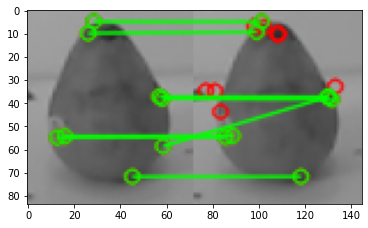

dedected!


In [26]:
img1 = cv2.imread('pear_1/pear_1_1_1_crop.png',0) # queryImage
img2 = cv2.imread('pear_1/pear_1_1_2_crop.png',0) # trainImage

if siftMatcher(img1,img2,True): 
    print("dedected!")

In [14]:
siftProcedure("pear_1/pear_",[1],[1,2,4],[200,200,200])

This takes time.. Calculating i = 0 to 3
Calculating i= 0
Calculating i= 1
Calculating i= 2
[[57  3]
 [ 0  0]]


In [17]:
siftProcedure("apple_1/apple_",[1],[1,2,4],[200,200,200])

This takes time.. Calculating i = 0 to 3
Calculating i= 0
Calculating i= 1
Calculating i= 2
[[58  2]
 [ 0  0]]


In [18]:
siftProcedure("ball_1/ball_",[1],[1,2,4],[200,200,200])

This takes time.. Calculating i = 0 to 3
Calculating i= 0
Calculating i= 1
Calculating i= 2
[[60  0]
 [ 0  0]]


In [19]:
siftProcedure("banana_1/banana_",[1],[1,2,4],[200,200,200])

This takes time.. Calculating i = 0 to 3
Calculating i= 0
Calculating i= 1
Calculating i= 2
[[60  0]
 [ 0  0]]


In [29]:
siftProcedure("cap_1/cap_",[1],[1,2,4],[180,180,180])

This takes time.. Calculating i = 0 to 3
Calculating i= 0
Calculating i= 1
Calculating i= 2
[[60  0]
 [ 0  0]]


In [31]:
siftProcedure("peach_1/peach_",[1],[1,2,4],[180,180,180])

This takes time.. Calculating i = 0 to 3
Calculating i= 0
Calculating i= 1
Calculating i= 2
[[60  0]
 [ 0  0]]


In [33]:
siftProcedure("flashlight_1/flashlight_",[1],[1,2,4],[160,160,160])

This takes time.. Calculating i = 0 to 3
Calculating i= 0
Calculating i= 1
Calculating i= 2
[[60  0]
 [ 0  0]]


In [34]:
siftProcedure("garlic_1/garlic_",[1],[1,2,4],[160,160,160])

This takes time.. Calculating i = 0 to 3
Calculating i= 0
Calculating i= 1
Calculating i= 2
[[60  0]
 [ 0  0]]


In [39]:
siftProcedure("onion_1/onion_",[1],[1,2,4],[160,160,160])

This takes time.. Calculating i = 0 to 3
Calculating i= 0
Calculating i= 1
Calculating i= 2
[[57  3]
 [ 0  0]]
